# Capstone 2

Step 1 of the DSM was already completed, so we'll begin with step 2 of DSM.



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#check current working directory
os.getcwd()

'C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two'

In [3]:
#need to change working directory to data, where the data are saved
path="C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data"
os.chdir(path)
#check and see what files are in data folder
os.listdir()

['OceanHourlySales2016.xlsx', 'OceanHourlySales2017.xlsx', 'processed']

<font color='teal'> **I'll use both 2016 and 2017 excel files, which has the months of sales in a hourly base in sheets named Jan to Dec**</font>

In [4]:
#read the excels into xls
xls2016 = pd.ExcelFile('OceanHourlySales2016.xlsx')
xls2017 = pd.ExcelFile('OceanHourlySales2017.xlsx')

#read one sheet from 2016 and see its components
df = pd.read_excel(xls2016, 'Dec')
df.head()

,Unnamed: 0,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,AVG
0,Time,2016-12-05 00:00:00,2016-12-06 00:00:00,2016-12-07 00:00:00,2016-12-08 00:00:00,2016-12-09 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00,NaN
1,11:00:00,68.43,41.83,36.4,53.84,24.05,15.2,0,34.25
2,12:00:00,48.85,95.09,79.42,36.44,65.03,46.26,69.93,63.0029
3,13:00:00,101.34,115.09,41.12,80.89,71.51,54.59,74.43,76.9957
4,14:00:00,129.75,60.77,67.68,63.36,80.83,69.26,155.25,89.5571


## Data Definition

In [5]:
#check it's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  85 non-null     object
 1   Monday      83 non-null     object
 2   Tuesday     83 non-null     object
 3   Wednesday   83 non-null     object
 4   Thursday    83 non-null     object
 5   Friday      88 non-null     object
 6   Saturday    75 non-null     object
 7   Sunday      83 non-null     object
 8   AVG         84 non-null     object
dtypes: object(9)
memory usage: 6.7+ KB


In [6]:
#we're going to need the sales from hour to hour, so we'll remove the AVG column
df=df.iloc[:, :8]     #do so by selecting all rows but only up to 8 columns

#let's also rename unnamed: 0 to Time
df.columns.values[0] = 'Time'
df.head()

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Time,2016-12-05 00:00:00,2016-12-06 00:00:00,2016-12-07 00:00:00,2016-12-08 00:00:00,2016-12-09 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00
1,11:00:00,68.43,41.83,36.4,53.84,24.05,15.2,0
2,12:00:00,48.85,95.09,79.42,36.44,65.03,46.26,69.93
3,13:00:00,101.34,115.09,41.12,80.89,71.51,54.59,74.43
4,14:00:00,129.75,60.77,67.68,63.36,80.83,69.26,155.25


In [7]:
#let's check the values we have for the column 'Time' (plan to use it as index)
df['Time'].value_counts()

20:00:00    5
19:00:00    5
15:00:00    5
14:00:00    5
16:00:00    5
23:00:00    5
13:00:00    5
11:00:00    5
18:00:00    5
PM          5
17:00:00    5
Total       5
Time        5
21:00:00    5
22:00:00    5
AM          5
12:00:00    5
Name: Time, dtype: int64

In [8]:
#we don't need the Total AM/PM rows
df = df[~df['Time'].isin(['AM', 'PM', 'Total'])]

#let's check again
df['Time'].value_counts()

20:00:00    5
22:00:00    5
21:00:00    5
Time        5
17:00:00    5
18:00:00    5
19:00:00    5
11:00:00    5
13:00:00    5
23:00:00    5
16:00:00    5
14:00:00    5
15:00:00    5
12:00:00    5
Name: Time, dtype: int64

In [9]:
#checking df's last 15 rows, since there should be 4 weeks in a month, yet there's 5 values for each hour
df.tail(15)

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
77,11:00:00,59.345,40.9275,40.43,51.7425,46.2925,39.965,20.045
78,12:00:00,54.03,73.095,61.2575,47.8225,78.42,136.53,84.345
79,13:00:00,85.6525,109.755,89.2975,78.3975,74.37,104.655,124.775
80,14:00:00,106.422,88.945,71.08,79.175,82.97,157.65,135.968
81,15:00:00,105.845,106.527,91.8625,89.93,98.09,147.985,203.648
82,16:00:00,139.3,104.838,91.5275,148.685,118.43,120.882,130.868
83,17:00:00,87.195,63.935,95.0225,59.4675,67.4725,104.493,112.668
84,18:00:00,72.57,92.3675,85.5425,76.61,78.7875,74.335,120.463


In [10]:
#remove empty rows, so we'll drop rows where the value is NaN in the Time column
df.dropna(subset = ['Time'], inplace=True)
df.tail(15)

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
70,23:00:00,NaN,NaN,NaN,NaN,35.21,NaN,NaN
76,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
77,11:00:00,59.345,40.9275,40.43,51.7425,46.2925,39.965,20.045
78,12:00:00,54.03,73.095,61.2575,47.8225,78.42,136.53,84.345
79,13:00:00,85.6525,109.755,89.2975,78.3975,74.37,104.655,124.775
80,14:00:00,106.422,88.945,71.08,79.175,82.97,157.65,135.968
81,15:00:00,105.845,106.527,91.8625,89.93,98.09,147.985,203.648
82,16:00:00,139.3,104.838,91.5275,148.685,118.43,120.882,130.868
83,17:00:00,87.195,63.935,95.0225,59.4675,67.4725,104.493,112.668
84,18:00:00,72.57,92.3675,85.5425,76.61,78.7875,74.335,120.463


In [11]:
#the last week is the weekly average, let's remove that, we'll do so by removing the last 14 rows
#but we need to make sure the previous rows are good, so we'll do so if there exist a value named 'Monday'
#on the [-14] row's Monday column (it's supposed to be the date, only the avg week has the value as Monday)
if df.iloc[-14]['Monday'] == 'Monday':
    df = df[:-14]
df.tail(15)

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
51,23:00:00,NaN,NaN,NaN,NaN,90.48,NaN,NaN
57,Time,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00,2017-01-01 00:00:00
58,11:00:00,22.27,38.19,11.91,48.54,30.98,34.22,35.7
59,12:00:00,16.3,64.58,62.75,44.9,69.24,66.94,78.57
60,13:00:00,70.9,130.33,88.9,121.44,118.86,129.39,150.28
61,14:00:00,96.56,71.25,71.52,85.99,74.31,226.19,137.23
62,15:00:00,151.16,122.81,91.35,140.9,126.38,147.41,231.21
63,16:00:00,94.81,69.89,127.88,174.19,52.98,179.84,127.24
64,17:00:00,161.21,113.45,98.31,61.1,64.58,NaN,108.06
65,18:00:00,86.37,97.48,119.95,96.84,66.92,NaN,128.6


In [12]:
#we need to make it to a wide list, so we'll merge them from left to right to make a month
#before that, lets reset the index
df.reset_index(drop=True, inplace=True)

In [13]:
#week one is row 0~13 which is df[0:14], week2 is 14~27, week3 is 28~41, week4 is 42~55
#occassionaly there might be week5, which is 56~69, we'll do so if len(df)>60
df1 = df[:14]
df2 = df[14:28]
df3 = df[28:42]
df4 = df[42:56]
if len(df) > 60:
    df5 = df[56:70]
else:
    df5 = 0     #we'll set df5=0 so it's false that way we can use it for the following if->else statement

#let's merge them, need reduce function
from functools import reduce
if df5 == True:
    dfmerged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4, df5])
else:
    dfmerged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4])
dfmerged.head(15)

,Time,Monday_x,Tuesday_x,Wednesday_x,Thursday_x,Friday_x,Saturday_x,Sunday_x,Monday_y,Tuesday_y,...,Friday_x,Saturday_x,Sunday_x,Monday_y,Tuesday_y,Wednesday_y,Thursday_y,Friday_y,Saturday_y,Sunday_y
0,Time,2016-12-05 00:00:00,2016-12-06 00:00:00,2016-12-07 00:00:00,2016-12-08 00:00:00,2016-12-09 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00,2016-12-12 00:00:00,2016-12-13 00:00:00,...,2016-12-23 00:00:00,2016-12-24 00:00:00,2016-12-25 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00,2017-01-01 00:00:00
1,11:00:00,68.43,41.83,36.4,53.84,24.05,15.2,0,77.04,48.58,...,58.57,37.85,14.65,22.27,38.19,11.91,48.54,30.98,34.22,35.7
2,12:00:00,48.85,95.09,79.42,36.44,65.03,46.26,69.93,67.85,74.24,...,76.66,26.5,110.04,16.3,64.58,62.75,44.9,69.24,66.94,78.57
3,13:00:00,101.34,115.09,41.12,80.89,71.51,54.59,74.43,62.54,163.14,...,16.19,114.4,146.68,70.9,130.33,88.9,121.44,118.86,129.39,150.28
4,14:00:00,129.75,60.77,67.68,63.36,80.83,69.26,155.25,78.38,142.5,...,93.8,164.75,143.11,96.56,71.25,71.52,85.99,74.31,226.19,137.23
5,15:00:00,73.37,105.77,80.8,58.94,112.93,109.83,195.62,114.08,88.82,...,96.19,206.62,267.09,151.16,122.81,91.35,140.9,126.38,147.41,231.21
6,16:00:00,131.18,177,68,123.91,168.33,94.69,103.45,104.48,70.36,...,132.33,106.04,152.77,94.81,69.89,127.88,174.19,52.98,179.84,127.24
7,17:00:00,70.78,41.1,86.02,50.59,106.57,77.23,107.46,54.52,40.4,...,56.84,141.52,107.64,161.21,113.45,98.31,61.1,64.58,NaN,108.06
8,18:00:00,81.61,62.75,58.55,54.24,86.65,59.64,87.2,93.28,119.72,...,54.31,NaN,141.98,86.37,97.48,119.95,96.84,66.92,NaN,128.6
9,19:00:00,59.58,90.57,87.37,23.7,98.62,72.9,64.97,104.46,53.67,...,68.17,NaN,91.05,63.45,91.44,72.52,151.06,120.79,NaN,85.69


In [14]:
#we'll now make it into a long list by trasnposing the df
dft = dfmerged.T
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Time,Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Monday_x,2016-12-05 00:00:00,68.43,48.85,101.34,129.75,73.37,131.18,70.78,81.61,59.58,36.2,81.02,49.03,NaN
Tuesday_x,2016-12-06 00:00:00,41.83,95.09,115.09,60.77,105.77,177,41.1,62.75,90.57,81.64,65.03,20.1,NaN
Wednesday_x,2016-12-07 00:00:00,36.4,79.42,41.12,67.68,80.8,68,86.02,58.55,87.37,19.75,19.64,28.65,NaN
Thursday_x,2016-12-08 00:00:00,53.84,36.44,80.89,63.36,58.94,123.91,50.59,54.24,23.7,38.58,103.92,53.35,NaN


In [15]:
# let's fill the NaNs for columnws 1~12 by its column mean
for i in range(1, 13):
    dft[i] = dft[i].fillna(dft.iloc[1:, i].mean())
    
# the store closes on 23:00 so we'll fill 0 for those NaN in that column
dft[13] = dft[13].fillna(0)

dft.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [16]:
#rename the columns names using first row's values
dft.columns = dft.iloc[0]
dft.head()

Time,Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Time,Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Monday_x,2016-12-05 00:00:00,68.43,48.85,101.34,129.75,73.37,131.18,70.78,81.61,59.58,36.2,81.02,49.03,0
Tuesday_x,2016-12-06 00:00:00,41.83,95.09,115.09,60.77,105.77,177,41.1,62.75,90.57,81.64,65.03,20.1,0
Wednesday_x,2016-12-07 00:00:00,36.4,79.42,41.12,67.68,80.8,68,86.02,58.55,87.37,19.75,19.64,28.65,0
Thursday_x,2016-12-08 00:00:00,53.84,36.44,80.89,63.36,58.94,123.91,50.59,54.24,23.7,38.58,103.92,53.35,0


In [17]:
dft.columns

Index([  'Time', 11:00:00, 12:00:00, 13:00:00, 14:00:00, 15:00:00, 16:00:00,
       17:00:00, 18:00:00, 19:00:00, 20:00:00, 21:00:00, 22:00:00, 23:00:00],
      dtype='object', name='Time')

In [18]:
#changing the 1st column index to Date to set it as row index later
dft = dft.rename(columns={'Time': 'Date'})
dft.head()

Time,Date,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Time,Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Monday_x,2016-12-05 00:00:00,68.43,48.85,101.34,129.75,73.37,131.18,70.78,81.61,59.58,36.2,81.02,49.03,0
Tuesday_x,2016-12-06 00:00:00,41.83,95.09,115.09,60.77,105.77,177,41.1,62.75,90.57,81.64,65.03,20.1,0
Wednesday_x,2016-12-07 00:00:00,36.4,79.42,41.12,67.68,80.8,68,86.02,58.55,87.37,19.75,19.64,28.65,0
Thursday_x,2016-12-08 00:00:00,53.84,36.44,80.89,63.36,58.94,123.91,50.59,54.24,23.7,38.58,103.92,53.35,0


In [19]:
#setting row index
dft = dft.set_index('Date')
dft.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,
Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2016-12-05 00:00:00,68.43,48.85,101.34,129.75,73.37,131.18,70.78,81.61,59.58,36.2,81.02,49.03,0
2016-12-06 00:00:00,41.83,95.09,115.09,60.77,105.77,177,41.1,62.75,90.57,81.64,65.03,20.1,0
2016-12-07 00:00:00,36.4,79.42,41.12,67.68,80.8,68,86.02,58.55,87.37,19.75,19.64,28.65,0
2016-12-08 00:00:00,53.84,36.44,80.89,63.36,58.94,123.91,50.59,54.24,23.7,38.58,103.92,53.35,0


In [20]:
#remove first row
dft = dft.iloc[1:]
dft.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,
2016-12-05 00:00:00,68.43,48.85,101.34,129.75,73.37,131.18,70.78,81.61,59.58,36.2,81.02,49.03,0
2016-12-06 00:00:00,41.83,95.09,115.09,60.77,105.77,177,41.1,62.75,90.57,81.64,65.03,20.1,0
2016-12-07 00:00:00,36.4,79.42,41.12,67.68,80.8,68,86.02,58.55,87.37,19.75,19.64,28.65,0
2016-12-08 00:00:00,53.84,36.44,80.89,63.36,58.94,123.91,50.59,54.24,23.7,38.58,103.92,53.35,0
2016-12-09 00:00:00,24.05,65.03,71.51,80.83,112.93,168.33,106.57,86.65,98.62,28.81,94.93,80.51,57.1


# Defining Function to clean data
The goal is to compile all 2016's sales in one df, and 2017 in another, with both data starting with Monday, and no missing days in between. So we can check their covariance/correlation and see if days of the week/year matter.

In [21]:
# defining a function that takes in a dataframe and returns a cleaned dataframe
def clean_data(df):
    df=df.iloc[:, :8]     # keep the first 8 columns but not the AVG column
    df.columns.values[0] = 'Time'    # rename unnamed: 0 to Time
    df = df[~df['Time'].isin(['AM', 'PM', 'Total'])]    # remove the Total AM/PM rows

    # remove empty rows, so we'll drop rows where the value is NaN in the Time column
    df.dropna(subset = ['Time'], inplace=True)
    
    #the last week is the weekly average, let's remove that, we'll do so by removing the last 14 rows
    #but we need to make sure the previous rows are good, so we'll do so if there exist a value named 'Monday'
    #on the [-14] row's Monday column (it's supposed to be the date, only the avg week has the value as Monday)
    if df.iloc[-14]['Monday'] == 'Monday':
        df = df[:-14]
    
    #reset the index
    df.reset_index(drop=True, inplace=True)
    
    # make it to a wide list, so we'll merge them from left to right make a month    
    #week one is row 0~13 which is df[0:14], week2 is 14~27, week3 is 28~41, week4 is 42~55
    #occassionaly there might be week5, which is 56~69, we'll do so if len(df)>60
    # merge them, need reduce function
    from functools import reduce
    df1 = df[:14]
    df2 = df[14:28]
    df3 = df[28:42]
    df4 = df[42:56]
    if len(df) > 60:
        df5 = df[56:70]
        dfmerged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4, df5])
    else:
        dfmerged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), [df1, df2, df3, df4])
        
    dft = dfmerged.T    # make it into a long list by trasnposing the df
    # fill the NaNs for columnws 1~12 by its column mean
    for i in range(1, 13):
        dft[i] = dft[i].fillna(dft.iloc[1:, i].mean())
    # the store closes on 23:00 so we'll fill 0 for those NaN in that column
    dft[13] = dft[13].fillna(0)  
    dft.columns = dft.iloc[0]    # rename the columns to first row
    dft = dft.rename(columns={'Time': 'Date'})    #changing the 1st column index to Date to set it as row index later
    dft = dft.set_index('Date')    # setting row index
    dft = dft.iloc[1:]    #remove first row
    return dft

In [22]:
#read the rest of the sheets into dataframes
#make a month list to iterate
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#dict comprehension
dict_2016 = {month:pd.read_excel(xls2016, month) for month in month_list}
dict_2017 = {month:pd.read_excel(xls2017, month) for month in month_list}

In [23]:
#combine all the dfs by year, but we have to clean them first
df2016 = pd.concat([clean_data(dict_2016[month]) for month in month_list])
df2017 = pd.concat([clean_data(dict_2017[month]) for month in month_list])

#then combine both years to df24 for 24 months, so we can check both df at once
df24 = pd.concat([df2016, df2017])
df24.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2016-01-04 to 2017-12-31
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   11:00:00  728 non-null    object
 1   12:00:00  728 non-null    object
 2   13:00:00  728 non-null    object
 3   14:00:00  728 non-null    object
 4   15:00:00  728 non-null    object
 5   16:00:00  728 non-null    object
 6   17:00:00  728 non-null    object
 7   18:00:00  728 non-null    object
 8   19:00:00  728 non-null    object
 9   20:00:00  728 non-null    object
 10  21:00:00  728 non-null    object
 11  22:00:00  728 non-null    object
 12  23:00:00  728 non-null    object
dtypes: object(13)
memory usage: 79.6+ KB


# Check the compiled df for error/NaN/outlier... etc.

In [24]:
#change the Dtype to float
df2016 = df2016.apply(pd.to_numeric, errors='ignore')
df2017 = df2017.apply(pd.to_numeric, errors='ignore')
df24 = df24.apply(pd.to_numeric, errors='ignore')

#check df info again
df24.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2016-01-04 to 2017-12-31
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   11:00:00  728 non-null    float64
 1   12:00:00  728 non-null    float64
 2   13:00:00  728 non-null    float64
 3   14:00:00  728 non-null    float64
 4   15:00:00  728 non-null    float64
 5   16:00:00  728 non-null    float64
 6   17:00:00  728 non-null    float64
 7   18:00:00  728 non-null    float64
 8   19:00:00  728 non-null    float64
 9   20:00:00  728 non-null    float64
 10  21:00:00  728 non-null    float64
 11  22:00:00  728 non-null    float64
 12  23:00:00  728 non-null    float64
dtypes: float64(13)
memory usage: 79.6 KB


In [25]:
#check for min/max to see if anything is unusual
print(df24.max())
print(df24.min())

Time
11:00:00    226.18
12:00:00    406.42
13:00:00    254.23
14:00:00    301.34
15:00:00    358.54
16:00:00    292.96
17:00:00    264.70
18:00:00    256.90
19:00:00    271.32
20:00:00    272.32
21:00:00    215.14
22:00:00    237.25
23:00:00    177.46
dtype: float64
Time
11:00:00     0.00
12:00:00    11.87
13:00:00     7.25
14:00:00    12.15
15:00:00    23.81
16:00:00    28.44
17:00:00    20.68
18:00:00     7.00
19:00:00    14.48
20:00:00    19.65
21:00:00    15.50
22:00:00     4.00
23:00:00     0.00
dtype: float64


In [26]:
#since there's no unusual numbers, we'll keep the NaN as it is, b/c Nan means the store wasnt open at that hour
#let's add a new column to indicate the daily sales and name it df24['Daily']
df24['Daily'] = df24.apply(lambda row: row.sum(), axis = 1) 
df2016['Daily'] = df2016.apply(lambda row: row.sum(), axis = 1) 
df2017['Daily'] = df2017.apply(lambda row: row.sum(), axis = 1) 
df24.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
Date,,,,,,,,,,,,,,
2016-01-04,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
2016-01-05,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2016-01-06,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
2016-01-07,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
2016-01-08,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [27]:
#let's use describe to see the min/max and 75%
df24['Daily'].describe()

count     728.000000
mean     1221.746804
std       267.557733
min       465.070000
25%      1042.882500
50%      1213.970000
75%      1377.530000
max      2795.950000
Name: Daily, dtype: float64

In [28]:
#let's check the days with over 2025; 3 std more than mean and considered outliers/something might be wrong
df24.loc[df24['Daily'] > 2025]

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
Date,,,,,,,,,,,,,,
2017-08-31,150.21,228.03,142.35,176.46,321.18,256.74,150.99,238.12,105.22,131.27,192.93,92.60,0.00,2186.10
2017-09-01,224.96,264.04,210.29,213.52,253.81,216.95,230.17,210.36,271.32,272.32,205.51,162.31,60.39,2795.95
2017-09-02,173.97,282.15,182.63,242.13,312.23,292.96,187.25,256.90,150.05,166.69,149.25,176.22,85.13,2657.56
2017-10-06,141.30,216.29,167.76,260.65,282.04,204.99,181.84,106.83,142.50,162.91,128.98,93.37,58.04,2147.50


In [29]:
# finding out the row index, 241~243 is 8/31~9/2017.
df2017.iloc[241:245, :1]

Time,11:00:00
Date,
2017-08-31,150.21
2017-09-01,224.96
2017-09-02,173.97
2017-09-03,53.40


In [30]:
df2017.iloc[241:245, 13]

Date
2017-08-31    2186.10
2017-09-01    2795.95
2017-09-02    2657.56
2017-09-03    1649.04
Name: Daily, dtype: float64

In [31]:
# 8/31~9/2 SF had Comic con and thus much more people were in SF than usual, we'll replace those 3 days hourly sales
# to the yearly average
# let's create a lit of the averages
hr_avg_list2017 = [df2017.iloc[:, i:(i+1)].mean() for i in range(13)]

# 8/31 is Thursday, so we'll only do the values up to the 22:00 hour
for i in range(12):
        df2017.iloc[241, i:(i+1)] = hr_avg_list2017[i]

# 9/1 and 9/2 are weekends which the store open until midnight and thus need all the values replaced
for i in range(13):
    df2017.iloc[242, i:(i+1)] = hr_avg_list2017[i]
    df2017.iloc[243, i:(i+1)] = hr_avg_list2017[i]

# we need the update the Daily column for those 3 rows as well
for i in range(241, 244):
    df2017.iloc[i, 13] = df2017.iloc[i, :13].sum()

In [32]:
# reconcat and check for outlier again
df24 = pd.concat([df2016, df2017])
df24.loc[df24['Daily'] > 2025]

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
Date,,,,,,,,,,,,,,
2017-10-06,141.3,216.29,167.76,260.65,282.04,204.99,181.84,106.83,142.5,162.91,128.98,93.37,58.04,2147.5


In [33]:
#in order to plot both 2016 and 2017 in the same graph, we'll let the x be the day of the year, so it'll be range(365)
df2016r = df2016.reset_index(drop=True)
df2017r = df2017.reset_index(drop=True)
df2016r.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [34]:
#let's check the number of days in each data
print('df2016r has ' + str(len(df2016r)) + ' days of data, starting with Monday.')
print('df2017r has ' + str(len(df2017r)) + ' days of data, starting with Monday.')

df2016r has 364 days of data, starting with Monday.
df2017r has 364 days of data, starting with Monday.


# EXPLORATORY ANALYSIS

# Daily Sales (Day of the Year with 364 days)

In [35]:
# define a function to do the covariance/correlation calculation
from numpy import cov
from scipy.stats import pearsonr
def covr_calc(df1, df2):
    covariance = cov(df1, df2)
    print('covariance:' + str(covariance))
    #Pearson’s Correlation
    pearson = pearsonr(df1, df2)
    print('pearson:' + str(pearson))

In [36]:
covr_calc(df2016['Daily'], df2017['Daily'])

covariance:[[58886.50220385 20852.0989184 ]
 [20852.0989184  68506.57827914]]
pearson:(0.3283036862879891, 1.3544716251149805e-10)


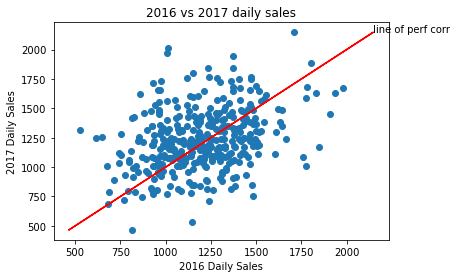

In [37]:
# use a plot for visual, we'll simply have x as 2016's daily sales and y as 2017's
plt.scatter(df2016.Daily, df2017.Daily)
plt.plot(df2017.Daily, df2017.Daily, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(df2017.Daily), max(df2017.Daily)))
# Labels
plt.xlabel('2016 Daily Sales')
plt.ylabel('2017 Daily Sales')
plt.title('2016 vs 2017 daily sales')
plt.show()

In [38]:
df2017.Daily

Date
2017-01-02    1121.370000
2017-01-03     683.350000
2017-01-04     800.180000
2017-01-05     996.040000
2017-01-06    1225.220000
                 ...     
2017-12-27     848.410000
2017-12-28    1047.620000
2017-12-29    1037.370000
2017-12-30    1149.040000
2017-12-31    1032.014615
Name: Daily, Length: 364, dtype: float64

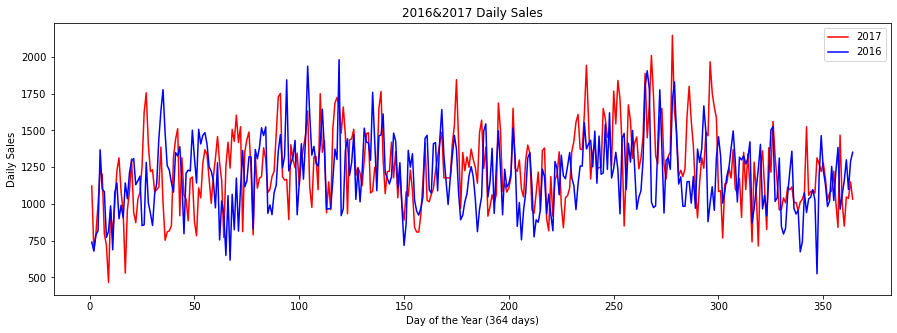

In [251]:
# let's do a line plot of 2017 daily / 2016 daily, it should be a flat line all across if the correlation is high
# first, let's creat a list that has the 2017 Daily / 2016 Daily's values
fig= plt.figure(figsize=(15,5))
plt.plot(range(1, 365), df2017.Daily, 'r')
plt.plot(range(1,365), df2016.Daily, 'b')
plt.legend(['2017', '2016'])
# Labels
plt.xlabel('Day of the Year (364 days)')
plt.ylabel('Daily Sales')
plt.title('2016&2017 Daily Sales')
plt.show()

The correlation and covariance were all positive, indicating that when the sales at a certain day is increasing in 2016 it is likely to be increasing in 2017 as well. But the correlation isn't high (both the number and the visual weren't obvious). Then if we look at the daily sales between 2017 & 2016, we can see that the sales have lots of up and downs, but there are some over lapping between them, suggesting seasonality/trend.

# Monthly Sales

In [40]:
# get the monthly sales
monthly2016 = df2016r.Daily.groupby(df2016.index.month).sum()
monthly2017 = df2017r.Daily.groupby(df2017.index.month).sum()

# let's do a list comprehension to store the values so we can do stats on them
monthly2016 = [monthly2016[i] for i in range(1,13)]
monthly2017 = [monthly2017[i] for i in range(1,13)]
monthly2016

[29670.498888888887,
 37205.3237037037,
 34261.16240591398,
 39669.840000000004,
 40581.6,
 35244.50999999999,
 35850.027058823536,
 36106.89000000001,
 39045.18000000001,
 38924.41,
 35246.587941176476,
 33431.25558404558]

In [41]:
# calculate covariance matrix/correlation
covr_calc(monthly2016, monthly2017)

covariance:[[ 9429131.8420503   8756447.55117195]
 [ 8756447.55117195 18436901.06482949]]
pearson:(0.6641224080884998, 0.018503889430860086)


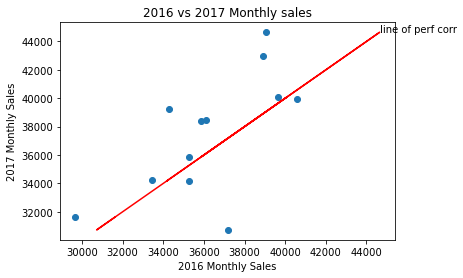

In [42]:
# use a plot for visual
data1=monthly2016
data2=monthly2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Monthly Sales')
plt.ylabel('2017 Monthly Sales')
plt.title('2016 vs 2017 Monthly sales')
plt.show()

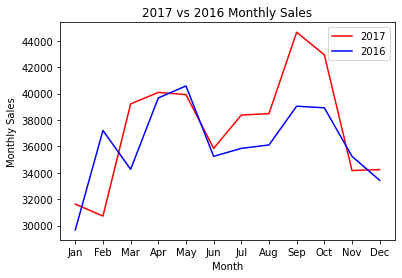

In [43]:
plt.plot(month_list, data2, 'r')
plt.plot(month_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('2017 vs 2016 Monthly Sales')
plt.show()

We can see that the month to month comparison has the correlation going from 0.33 increased to 0.64! And from the visuals, we can see there's much more correlation as well. The p value is 0.0185, we will reject the null hypothesis, the month of the year is a variable that may influence the sales, but based on the visual, it looks like not every month to month has the same trend. The following months are moving at the same direction: March to April (up), May to June (down), Jun to Sep (up), Sep to Nov (down). The following are moving the opposite of each other: Jan to Feb, Feb to Mar, April to May, Nov to Dec.
In simpler words, only 4 out of the 12 months the trend of the sales aren't going in the same direction, while 8 out of the 12 months the sales are moving towards the same direction.

# Weekly Sales

In [44]:
# get the weekly sales
weekly2016 = df2016r.Daily.groupby(df2016.index.week).sum()
weekly2017 = df2017r.Daily.groupby(df2017.index.week).sum()

# let's do a list comprehension to store the values so we can do stats on them
weekly2016 = [weekly2016[i] for i in range(1,53)]
weekly2017 = [weekly2017[i] for i in range(1,53)]

In [45]:
# calculate covariance matrix/correlation for weekly sales
covr_calc(weekly2016, weekly2017)

covariance:[[ 927969.12269571  494753.51414556]
 [ 494753.51414556 1300701.19752039]]
pearson:(0.45033256642060693, 0.000808405464252924)


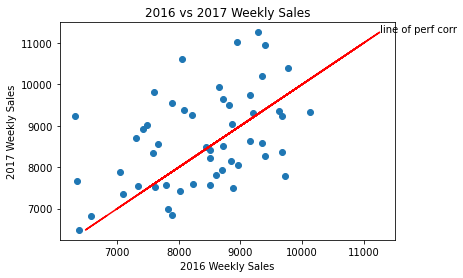

In [46]:
# weeklysales visual
# use a plot for visual
data1=weekly2016
data2=weekly2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Weekly Sales')
plt.ylabel('2017 Weekly Sales')
plt.title('2016 vs 2017 Weekly Sales')
plt.show()

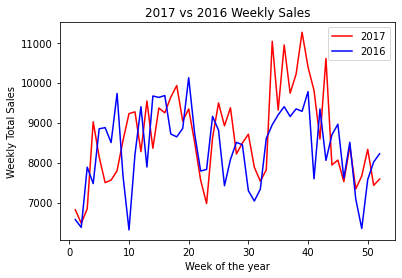

In [47]:
plt.plot(range(1, 53), data2, 'r')
plt.plot(range(1, 53), data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Week of the year')
plt.ylabel('Weekly Total Sales')
plt.title('2017 vs 2016 Weekly Sales')
plt.show()

With pearson:(0.44499433282102235, 0.0009483289375837) there is some correlation, it's not as strong as monthly sum's correlation.

# Day of the Week's Sales

In [48]:
# get the day of the week sales' sum
dowsum2016gb = df2016r.Daily.groupby(df2016.index.dayofweek).sum()
dowsum2017gb = df2017r.Daily.groupby(df2017.index.dayofweek).sum()

# let's do a list comprehension to store the values so we can do stats on them
dowsum2016 = [dowsum2016gb[i] for i in range(7)]
dowsum2017 = [dowsum2017gb[i] for i in range(7)]

# make a day of week list to help with iteration
dow_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# make a dataframe to store and view the data
dowsum_df = pd.DataFrame(dowsum2016, columns=['2016'])
dowsum_df['2017'] = dowsum2017
dowsum_df['DoW'] = dow_list
dowsum_df.set_index('DoW', inplace=True)
dowsum_df

,2016,2017
DoW,,
Mon,56396.622581,58660.300968
Tue,56741.775497,60544.960968
Wed,59459.960000,58684.391004
Thu,57016.847142,60961.014084
Fri,65669.288831,69303.220113
Sat,70283.705584,73723.276779
Sun,69669.085948,68409.052356


In [49]:
# calculate covariance matrix/correlation
covr_calc(dowsum2016, dowsum2017)

covariance:[[38501670.08556966 35024403.38430664]
 [35024403.38430664 36550021.48204015]]
pearson:(0.9336565400827258, 0.002100566944321353)


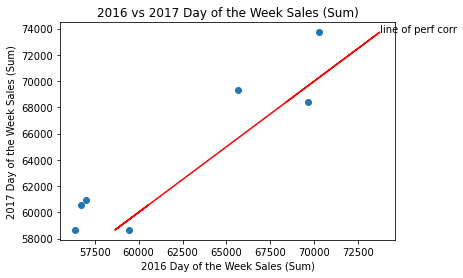

In [50]:
# use a plot for visual
data1=dowsum2016
data2=dowsum2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Day of the Week Sales (Sum)')
plt.ylabel('2017 Day of the Week Sales (Sum)')
plt.title('2016 vs 2017 Day of the Week Sales (Sum)')
plt.show()

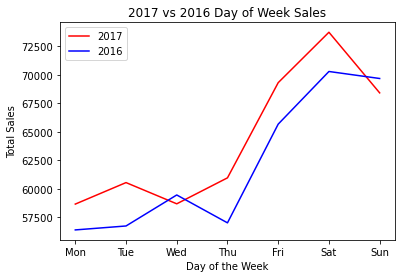

In [51]:
plt.plot(dow_list, data2, 'r')
plt.plot(dow_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('2017 vs 2016 Day of Week Sales')
plt.show()

In [52]:
# use the function to read the data into sales by day of week
# create a dict to iterrate
dow_iter_dict = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
# create an empty dict to store data
dow2016 = {}
for i, j in dow_iter_dict.items():
    dow2016[i] = [df2016r.Daily[i+j] for i in range(0, 364, 7)]
dow2017 = {}
for i, j in dow_iter_dict.items():
    dow2017[i] = [df2017r.Daily[i+j] for i in range(0, 364, 7)]

In [53]:
#check n see if there are 52 weeks
len(dow2017['Mon'])

52

In [84]:
# convert the dict to pandas df
dow2016 = pd.DataFrame.from_dict(dow2016)
dow2017 = pd.DataFrame.from_dict(dow2017)
dow2016.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,739.69,678.85,789.08,817.70,1368.45,1099.40,1083.620000
1,771.85,814.34,986.86,687.38,1077.86,1142.77,898.958889
2,990.65,904.19,1143.15,1034.86,1211.83,1292.85,1308.590000
3,1130.68,1157.04,1188.60,851.66,857.81,1282.69,1007.750000
4,934.56,852.53,1066.61,1140.14,1440.86,1633.75,1778.130000


In [81]:
# print the correlation and covariances    
for i in dow_list:
    print(i)
    covr_calc(dow2016[i], dow2017[i])
    print('')

Mon
covariance:[[47170.09584181  9379.56882821]
 [ 9379.56882821 64977.02770157]]
pearson:(0.16942191047648814, 0.22985851591966402)

Tue
covariance:[[39674.50304738 10303.68157599]
 [10303.68157599 80492.63459292]]
pearson:(0.18233020060702362, 0.19576355145691768)

Wed
covariance:[[63461.6679641   9885.54096005]
 [ 9885.54096005 52020.0391938 ]]
pearson:(0.1720518556937043, 0.2226000907152999)

Thu
covariance:[[44728.15812046  3122.22828547]
 [ 3122.22828547 38001.20989147]]
pearson:(0.07573130394188185, 0.5936195605773416)

Fri
covariance:[[31366.88048422 11339.84466231]
 [11339.84466231 60400.27552299]]
pearson:(0.26052654557162136, 0.06212945905657994)

Sat
covariance:[[54737.52311875 15790.44631012]
 [15790.44631012 46468.19987635]]
pearson:(0.3130933980842945, 0.0238201629811029)

Sun
covariance:[[50886.65976659  9355.83827602]
 [ 9355.83827602 62553.90232529]]
pearson:(0.16582634557072704, 0.24004362598435852)



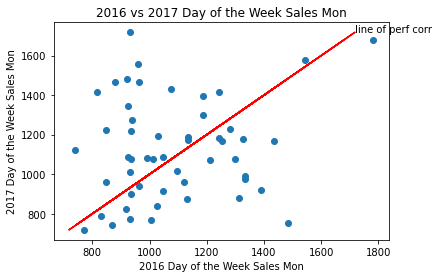

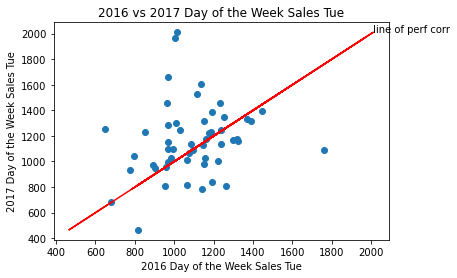

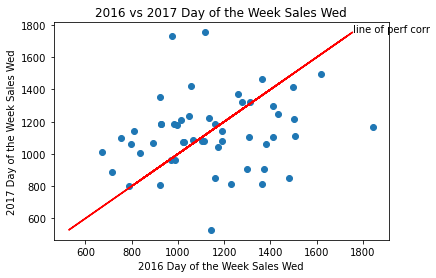

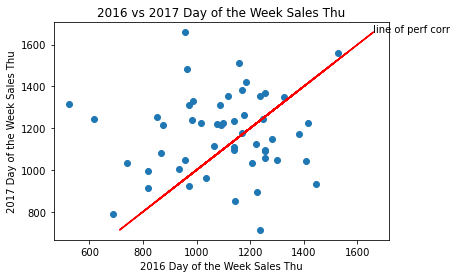

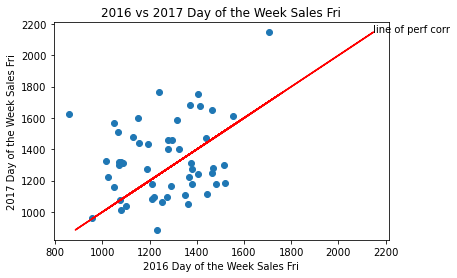

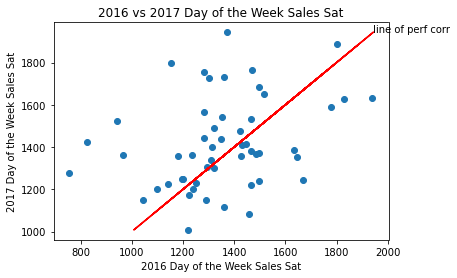

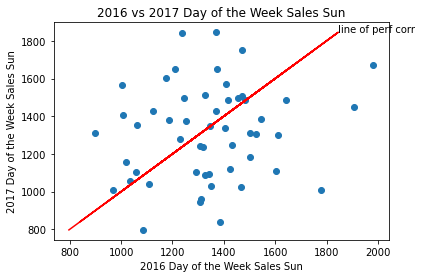

In [56]:
# use a plot for visual
for i in dow_list:
    data1=dow2016[i]
    data2=dow2017[i]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Day of the Week Sales ' + i)
    plt.ylabel('2017 Day of the Week Sales ' + i)
    plt.title('2016 vs 2017 Day of the Week Sales ' + i)
    plt.show()

In [138]:
# melt the dfs to prepare for seaborn plots
dow2016m = pd.melt(dow2016, value_vars=dow2016.columns, var_name='Day of Week', value_name='Daily Sales')
dow2017m = pd.melt(dow2017, value_vars=dow2017.columns, var_name='Day of Week', value_name='Daily Sales')

# add the year value to distinguish
dow2016m['year'] = '2016'
dow2017m['year'] = '2017'

dow24m = pd.concat([dow2016m, dow2017m])
dow24m.head()

,Day of Week,Daily Sales,year
0,Mon,739.69,2016
1,Mon,771.85,2016
2,Mon,990.65,2016
3,Mon,1130.68,2016
4,Mon,934.56,2016


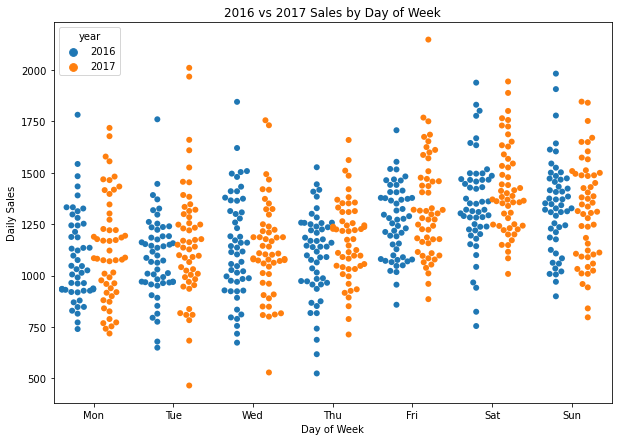

In [244]:
# using seaborn swarm plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.swarmplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, dodge=True, size=6, ax=ax)

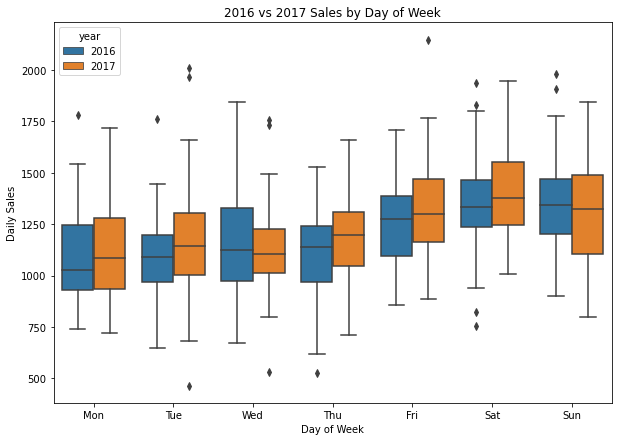

In [243]:
# using seaborn boxplot plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.boxplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, dodge=True, ax=ax)

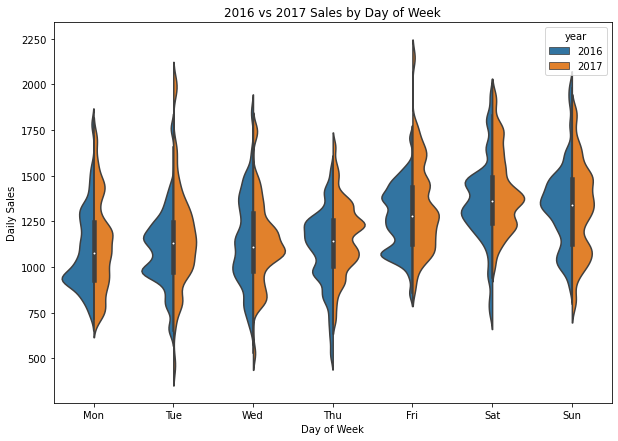

In [242]:
# using seaborn violin plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.violinplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, split=True, bw=0.2, ax=ax)

We can see that the Sum of the day of the week's sales in a yearly comparison has correlation of 0.934 with pvalue of 0.002. But if we're to comepare day of week's sales by day of the week for each day of the week between 2017&2016 (e.g. 52 monday sales from 2016 vs 52 monday sales from 2017), the correlation doesn't seem to exist. However, if we're to use the seaborn plots to visual the data of these 52 weeks of sales between 2016 and 2017, they're rather close to each other (most obviously from boxplot).

# Hour of the Day analysis

In [58]:
# we need a df that focus on hour of the day
# we first need to remove the Daily column
df2016h = df2016.iloc[:, :13]
df2017h = df2017.iloc[:, :13]

# then transpose it
df2016h = df2016h.T
df2017h = df2017h.T

#let's add the sum column
df2016h['Sum'] = df2016h.apply(lambda row: row.sum(), axis = 1)
df2017h['Sum'] = df2017h.apply(lambda row: row.sum(), axis = 1)
df2016h.tail()

Date,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-12-24 00:00:00,2016-12-25 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00,2017-01-01 00:00:00,Sum
Time,,,,,,,,,,,,,,,,,,,,,
19:00:00,56.02,93.65,57.22,128.00,143.23,74.14,109.64,68.12,85.32,94.80,...,80.782308,91.05,63.45,91.44,72.52,151.06,120.79,80.782308,85.69,32473.652702
20:00:00,79.35,75.90,52.53,77.01,105.70,89.94,72.14,84.11,82.95,83.69,...,81.508077,80.55,38.99,104.89,75.88,107.59,100.00,81.508077,62.06,33927.875702
21:00:00,58.34,27.45,46.87,91.02,182.96,78.05,64.06,37.74,48.67,152.06,...,95.245385,36.91,100.08,90.97,132.50,173.27,115.13,95.245385,117.45,35273.787212
22:00:00,31.68,31.70,49.12,75.42,89.71,89.77,35.55,43.39,53.99,72.54,...,77.486154,91.74,61.02,67.15,205.70,94.40,122.65,77.486154,89.25,25976.962118
23:00:00,0.00,0.00,0.00,0.00,64.12,27.70,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,35.21,0.000000,0.00,5199.390000


In [59]:
# let's find the cov/cor by the sum of sales of whole year by hour
covr_calc(df2016h.Sum, df2017h.Sum)

covariance:[[1.34670512e+08 1.49760272e+08]
 [1.49760272e+08 1.71358516e+08]]
pearson:(0.9858424588418698, 7.010465361445931e-10)


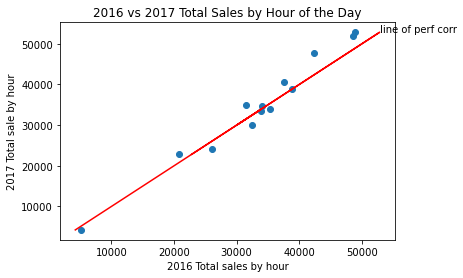

In [60]:
data1=df2016h.Sum
data2=df2017h.Sum
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Total sales by hour')
plt.ylabel('2017 Total sale by hour')
plt.title('2016 vs 2017 Total Sales by Hour of the Day')
plt.show()

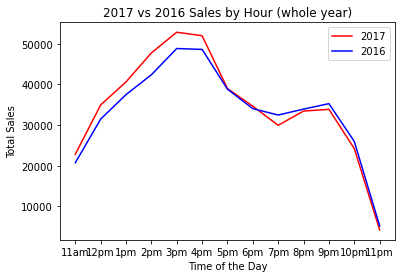

In [61]:
# create a list for store hours
store_hour_list = ['11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(store_hour_list, data2, 'r')
plt.plot(store_hour_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.title('2017 vs 2016 Sales by Hour (whole year)')
plt.show()

In [63]:
# let's find the pearson correlation of each hour's sales individually
for i in range(12):
    print(pearsonr(df2016r.iloc[:, i], df2017r.iloc[:, i]))

(0.18952872393938996, 0.00027630952955896555)
(0.11272080992033505, 0.03155239023021931)
(0.21729083092648865, 2.8965345626794056e-05)
(0.2350339732602467, 5.8320993723095205e-06)
(0.11472731902185335, 0.028628812873239894)
(0.22863449726401963, 1.0551325567311557e-05)
(0.2165552968664776, 3.087001153796864e-05)
(0.14465904835895388, 0.005692562162902241)
(0.15428128303573407, 0.0031668181177422084)
(0.15985195816751208, 0.002220884649090181)
(0.13989282224983277, 0.007518501708339909)
(0.14481168441679687, 0.005641315788201682)


In [166]:
df2016r.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [208]:
# make df for seaborn plot
# first, get a df without the daily sales
df2016rm = df2016r.iloc[:, :13]
df2017rm = df2017r.iloc[:, :13]

# melt the dfs to prepare for seaborn plots
df2016m = pd.melt(df2016rm, value_vars=df2016rm.columns, var_name='Hour of Day', value_name='Hourly Sales')
df2017m = pd.melt(df2017rm, value_vars=df2017rm.columns, var_name='Hour of Day', value_name='Hourly Sales')

# add the year value to distinguish
df2016m['year'] = '2016'
df2017m['year'] = '2017'

df24m = pd.concat([df2016m, df2017m])
df24m.head()

,Hour of Day,Hourly Sales,year
0,11:00:00,16.39,2016
1,11:00:00,22.45,2016
2,11:00:00,33.59,2016
3,11:00:00,8.40,2016
4,11:00:00,27.25,2016


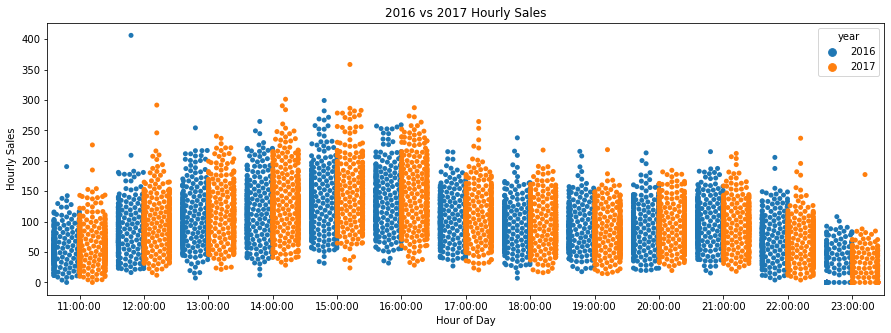

In [239]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.swarmplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

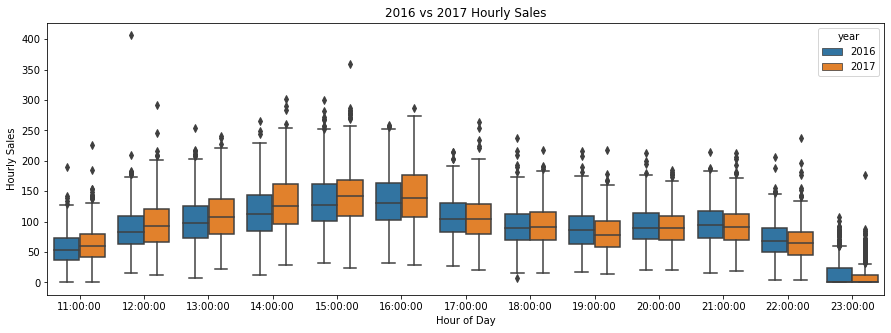

In [240]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

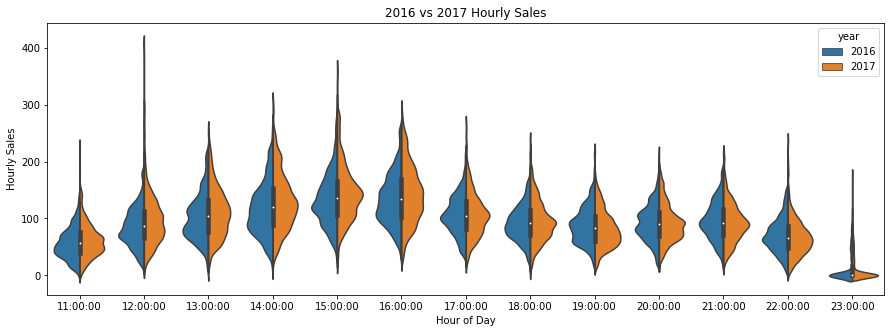

In [241]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.violinplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, split=True, bw=0.2, ax=ax)

The sum of hourly sales of the day has the highest correlation, it's at 0.986, and the pvalue is very close to 0 (e-10). If we look at the visuals, it's very obvious! But if we're to check the correlation between all the same hours across 364 days in 2016 vs in 2017, the coreelation is low, however, if we're to look at the visuals from the seaborn plots, they're very close to one another. We will reject the null hypothesis, the hour of the day defintely has effect on sales.

# Hour of the Day by Day of the Week

In [64]:
# recall dow_iter_dcit used earlier, we'll use it again to iterate n add new column to df2016h/df2017h
dow_iter_dict

{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [65]:
# let's add the day of the week's sum to the df2016h
for dow, i in dow_iter_dict.items():
    df2016h[dow] = df2016h.iloc[:, i:364:7].apply(lambda row: row.sum(), axis = 1)
    df2017h[dow] = df2017h.iloc[:, i:364:7].apply(lambda row: row.sum(), axis = 1)
df2016h.tail()

Date,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-12-31 00:00:00,2017-01-01 00:00:00,Sum,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Time,,,,,,,,,,,,,,,,,,,,,
19:00:00,56.02,93.65,57.22,128.00,143.23,74.14,109.64,68.12,85.32,94.80,...,80.782308,85.69,32473.652702,4115.200000,4054.341563,4529.54,4448.455702,4920.781562,4649.494615,5755.839259
20:00:00,79.35,75.90,52.53,77.01,105.70,89.94,72.14,84.11,82.95,83.69,...,81.508077,62.06,33927.875702,4178.420000,4493.292500,4701.96,4647.028992,4969.622500,5249.616154,5687.935556
21:00:00,58.34,27.45,46.87,91.02,182.96,78.05,64.06,37.74,48.67,152.06,...,95.245385,117.45,35273.787212,4188.160000,4359.817188,5056.87,5064.964660,5982.917188,5440.430769,5180.627407
22:00:00,31.68,31.70,49.12,75.42,89.71,89.77,35.55,43.39,53.99,72.54,...,77.486154,89.25,25976.962118,2922.522581,3313.222581,3581.47,3546.396121,5082.882581,4323.342308,3207.125948
23:00:00,0.00,0.00,0.00,0.00,64.12,27.70,0.00,0.00,0.00,0.00,...,0.000000,0.00,5199.390000,0.000000,0.000000,0.00,0.000000,2897.650000,2301.740000,0.000000


In [66]:
# since Sunday~Thursday the store is closed at 23:00 we'll create 2 lists to iterate
sunthu_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Sun']
frisat_list = ['Fri', 'Sat']

In [67]:
# print the covariance/pearson, iloc[range(12)] since 23:00 is 0
for i in sunthu_list:
    print(i)
    covr_calc(df2016h[i].iloc[range(12)], df2017h[i].iloc[range(12)])
    print('')

Mon
covariance:[[1537590.0037942  1572180.91258374]
 [1572180.91258374 1828600.99886382]]
pearson:(0.9376111634787521, 6.7001162384314534e-06)

Tue
covariance:[[ 946050.24310024 1162941.87497128]
 [1162941.87497128 1528097.52260994]]
pearson:(0.9672202314806345, 2.8210057091900906e-07)

Wed
covariance:[[1032205.10560606 1233941.49476558]
 [1233941.49476558 1702686.70355423]]
pearson:(0.9307738966833515, 1.1138367458327727e-05)

Thu
covariance:[[ 947582.08241372 1014005.00124774]
 [1014005.00124774 1277011.70679877]]
pearson:(0.921794765541287, 2.0182030554184038e-05)

Sun
covariance:[[3620033.54868716 3455953.34729851]
 [3455953.34729851 3537018.57291806]]
pearson:(0.9658126810667842, 3.472704349364109e-07)



In [68]:
# print the covariance/pearson for fri/sat
for i in frisat_list:
    print(i)
    covr_calc(df2016h[i], df2017h[i])
    print('')

Fri
covariance:[[1593556.24110074 2011953.91869744]
 [2011953.91869744 2847944.49403219]]
pearson:(0.9444273845975789, 1.1949144031490478e-06)

Sat
covariance:[[2818223.0625254  3379301.25646091]
 [3379301.25646091 4194127.21819652]]
pearson:(0.982920578839668, 1.9565254278085005e-09)



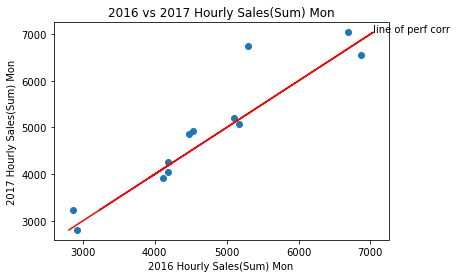

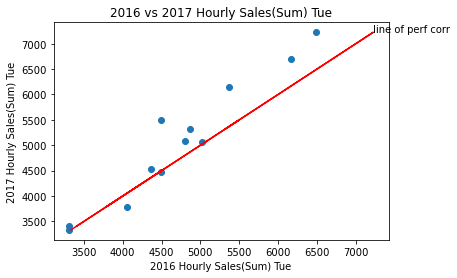

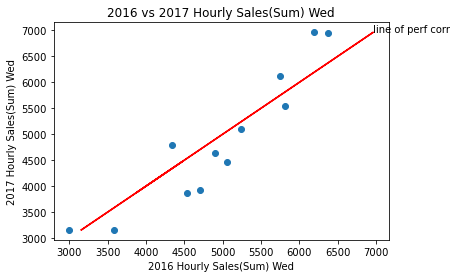

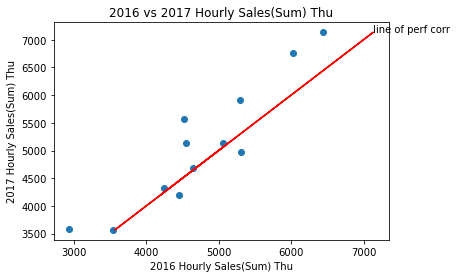

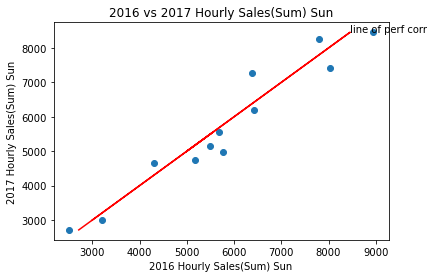

In [69]:
# use a plot for sun~thu
for i in sunthu_list:
    data1=df2016h[i].iloc[range(12)]
    data2=df2017h[i].iloc[range(12)]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Hourly Sales(Sum) ' + i)
    plt.ylabel('2017 Hourly Sales(Sum) ' + i)
    plt.title('2016 vs 2017 Hourly Sales(Sum) ' + i)
    plt.show()

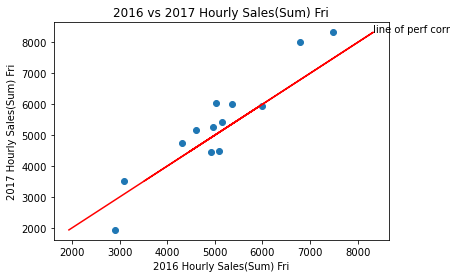

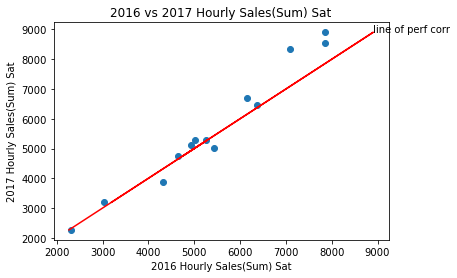

In [70]:
# use a plot for fri & sat
for i in frisat_list:
    data1=df2016h[i]
    data2=df2017h[i]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Hourly Sales(Sum) ' + i)
    plt.ylabel('2017 Hourly Sales(Sum) ' + i)
    plt.title('2016 vs 2017 Hourly Sales(Sum) ' + i)
    plt.show()

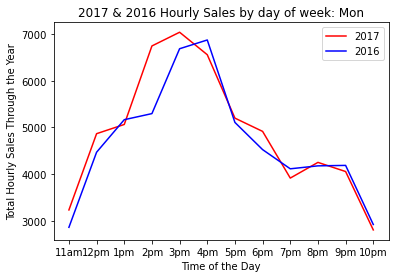

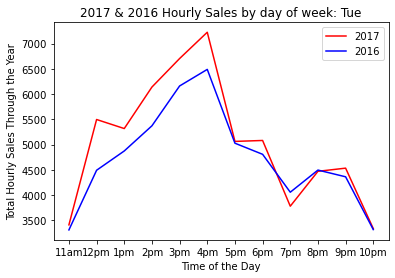

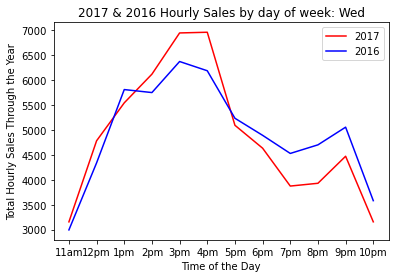

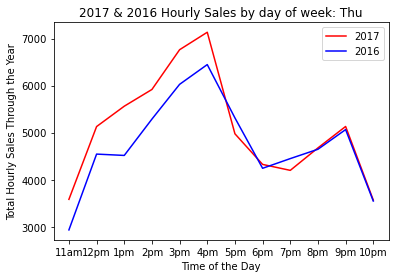

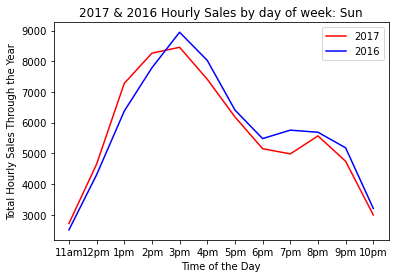

In [71]:
# 2017/2016 comparison, sun~thu
for j in sunthu_list:
    data1=[df2016h[j][i] for i in range(12)]
    data2=[df2017h[j][i] for i in range(12)]
    plt.plot(store_hour_list[:12], data2, 'r')
    plt.plot(store_hour_list[:12], data1, 'b')
    plt.legend(['2017', '2016'])
    plt.xlabel('Time of the Day')
    plt.ylabel('Total Hourly Sales Through the Year')
    plt.title('2017 & 2016 Hourly Sales by day of week: ' + j)
    plt.show()

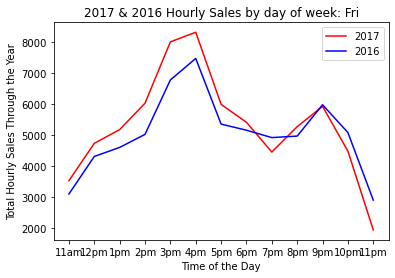

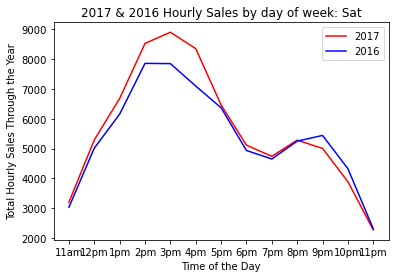

In [72]:
# 2017/2016 comparison, fri & sat
for j in frisat_list:
    data1=[df2016h[j][i] for i in range(13)]
    data2=[df2017h[j][i] for i in range(13)]
    plt.plot(store_hour_list, data2, 'r')
    plt.plot(store_hour_list, data1, 'b')
    plt.legend(['2017', '2016'])
    plt.xlabel('Time of the Day')
    plt.ylabel('Total Hourly Sales Through the Year')
    plt.title('2017 & 2016 Hourly Sales by day of week: ' + j)
    plt.show()

In [73]:
# let's check df2016r and see how to extract data into hour by day of week
df2016r.head()

Time,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [74]:
# this gives monday 11AM's sales
df2016r.iloc[0:364:7, 0].head()

0     16.39
7     11.35
14    39.05
21    42.05
28    63.04
Name: 11:00:00, dtype: float64

In [75]:
# print the pearson correlations
sunthu_iter_dict = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Sun': 6} #create this dict to iterate
sunthu_dict = {}
for i,j in sunthu_iter_dict.items():
    sunthu_dict[i] = [pearsonr(df2016r.iloc[j:364:7, k], df2017r.iloc[j:364:7, k]) for k in range(12)]

In [76]:
sunthu_dict

{'Mon': [(0.21899385827411452, 0.11880729684794121),
  (0.10784722848139418, 0.44664751174157985),
  (0.15434539802789782, 0.2746102278480463),
  (0.06953501225660633, 0.6242552038622933),
  (-0.019508797184793536, 0.8908149008902065),
  (-0.03877311584072461, 0.7849279401580175),
  (0.22937071220941924, 0.10190291097077155),
  (0.009881476168273812, 0.9445710807213273),
  (-0.049191549505788607, 0.7291082080110504),
  (0.059874255410763924, 0.6732860596703896),
  (0.26998696758516905, 0.05290556999337001),
  (-0.00580519609904806, 0.9674198143051644)],
 'Tue': [(0.23619502615009394, 0.09184055123548666),
  (0.30258083834368144, 0.0292358523076936),
  (0.20441803259139738, 0.1460444851410861),
  (0.243370791410698, 0.08211293943801456),
  (0.13524880226436337, 0.33907896993152803),
  (0.19971458334830142, 0.15575349317481205),
  (0.1501245546375906, 0.28810767385169417),
  (0.07600343773664937, 0.5922895069657387),
  (-0.09257037081453931, 0.513942556337908),
  (0.15707259727135492, 0.

In [77]:
# too many numbers to distract, let's try to find the max value of the correlation and see how strong it is by dow
for key, value in sunthu_dict.items():
    print(key, ':', max(value))

Mon : (0.26998696758516905, 0.05290556999337001)
Tue : (0.30258083834368144, 0.0292358523076936)
Wed : (0.4104609301549599, 0.0025083113065404007)
Thu : (0.3013057543371927, 0.029957598790367378)
Sun : (0.27613396501834053, 0.04753094211064997)


In [78]:
# do the same for fri&sat
frisat_iter_dict = {'Fri': 4, 'Sat': 5} #create this dict to iterate
frisat_dict = {}
for i,j in frisat_iter_dict.items():
    frisat_dict[i] = [pearsonr(df2016r.iloc[j:364:7, k], df2017r.iloc[j:364:7, k]) for k in range(13)]

In [79]:
frisat_dict

{'Fri': [(0.14876803904362182, 0.29253609396621444),
  (-0.1726729784665561, 0.22090933244143293),
  (0.16992990306416345, 0.2284439355865319),
  (-0.054375098536442464, 0.7018263897100002),
  (0.1656732521449508, 0.2404840290618316),
  (0.249954212247008, 0.07391870700416886),
  (0.04455701939386471, 0.7537865452964801),
  (-0.027755000592559073, 0.8451452551826192),
  (-0.1479732556220835, 0.29515118898307013),
  (0.1341407546378919, 0.34308738918295834),
  (0.08059665309289832, 0.5700432019124323),
  (-0.15455402577685037, 0.2739541235390757),
  (0.008846228251754934, 0.9503704828176094)],
 'Sat': [(0.40595946208614797, 0.002826599205558256),
  (-0.021017280108889806, 0.8824297341977893),
  (0.09400787868596389, 0.5073998812099494),
  (0.06015202316994471, 0.6718560852378911),
  (-0.1535866926435926, 0.277005013935486),
  (0.24274111656471217, 0.08293268240560328),
  (0.24883031839192643, 0.07526973948913648),
  (0.42944791124639714, 0.0014879810561207111),
  (0.21763374183056633, 0

In [80]:
for key, value in frisat_dict.items():
    print(key, ':', max(value))

Fri : (0.249954212247008, 0.07391870700416886)
Sat : (0.42944791124639714, 0.0014879810561207111)


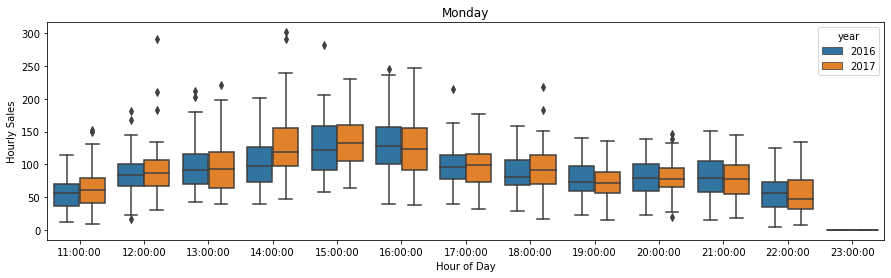

In [231]:
# Let's make boxplots of them to see
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Monday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[0::7]), dodge=True, ax=ax)

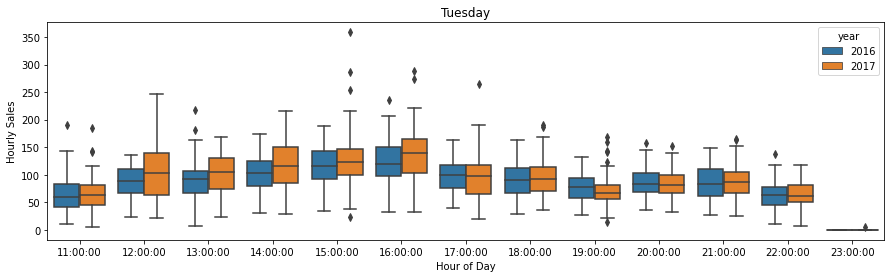

In [233]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Tuesday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[1::7]), dodge=True, ax=ax)

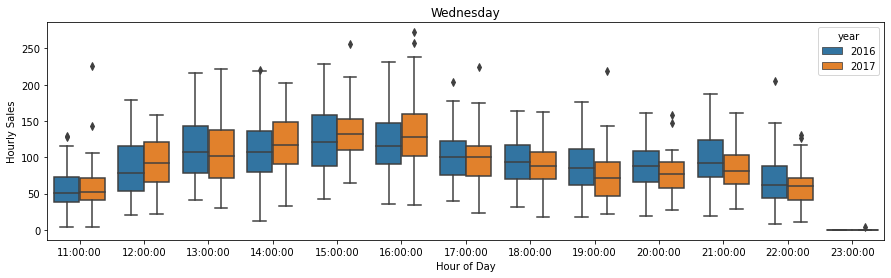

In [234]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Wednesday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[2::7]), dodge=True, ax=ax)

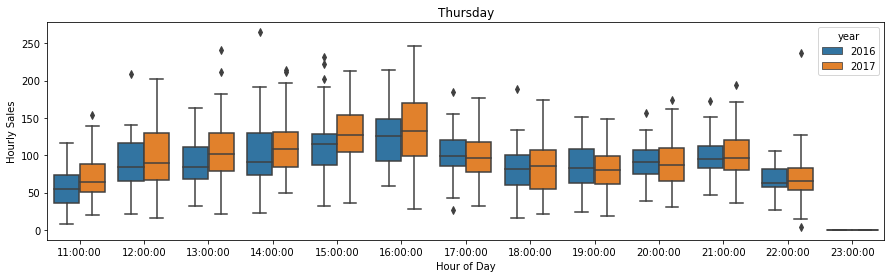

In [235]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Thursday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[3::7]), dodge=True, ax=ax)

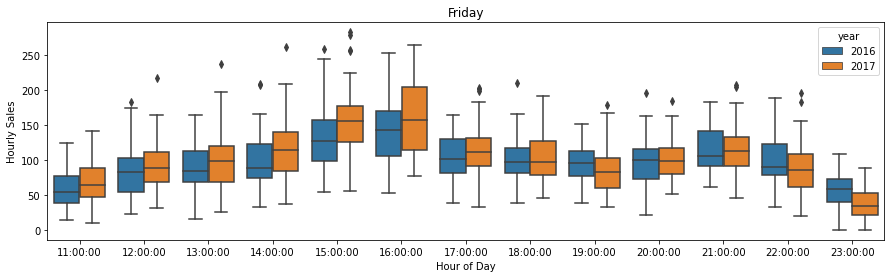

In [236]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Friday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[4::7]), dodge=True, ax=ax)

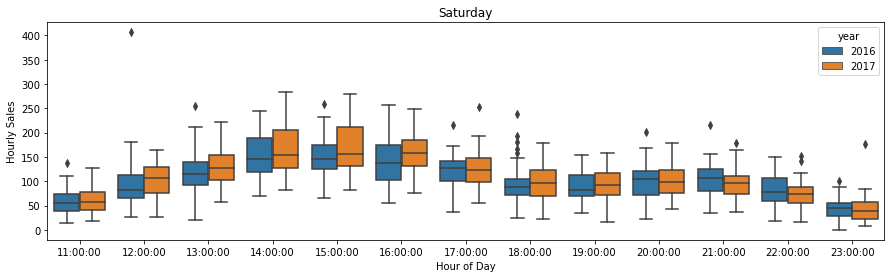

In [237]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Saturday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[5::7]), dodge=True, ax=ax)

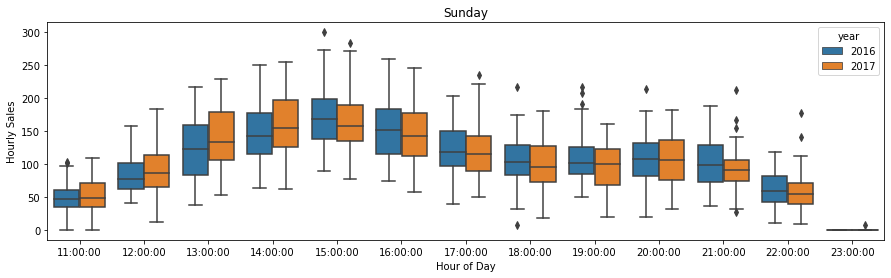

In [238]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Sunday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[6::7]), dodge=True, ax=ax)

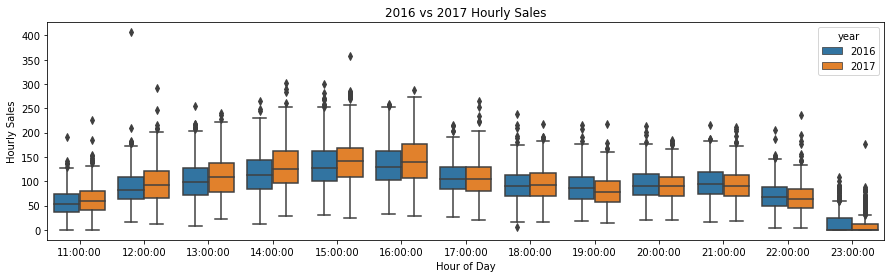

In [252]:
# recall the hourly sales figure
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

When we do the correlation test for the total hourly sales by day of the week, all the correlation were over 0.90 with pvalue close to 0. But when we do the correlation of each hour by hour, the correlation were a lot weaker/doesn't exist, however, if we're to look at the visuals, they're all rather close to each other. Then lets take a look at the hourly sales between 2016 and 2017, the main difference is that the whole year's hourly sales has less variation when compared to hour of the day by day of week. This means the standard deviation for hour of the day in a whole year is much smaller than hour of day by day of week.

# EDA Conclusion

If we're to compare the sum of the sales whether it's by day of week or by hour of the day or by both hour of the day and day of the week. All these variables have strong correlation (0.900+), even when if the correlation was samll (when we calculate the correlation not by the sum of the sales by for each day or hour), when viewed in visual, they're rather close to each other. Time is definitely a variable that may be used to predict the sales.